In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=ee-lv------lv-tso-0001exitstorage,ee-lv------lv-tso-0001entrytransmission,ee-lv------lv-tso-0001entrytransmissionlt---------,ee-lv------lv-tso-0001entryproduction,ee-lv------lv-tso-0001entrystorage,ee-lv------lv-tso-0001exitfinal%20consumers,ee-lv------lv-tso-0001exittransmission,ee-lv------lv-tso-0001exittransmissionlt---------&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesLVEE-LV------LV-TSO-0001entryTransm...        1   Aggregates   
1    1AggregatesLVEE-LV------LV-TSO-0001entryTransm...        1   Aggregates   
2    1AggregatesLVEE-LV------LV-TSO-0001exitFinal C...        1   Aggregates   
3    1AggregatesLVEE-LV------LV-TSO-0001exitStorage...        1   Aggregates   
4    1AggregatesLVEE-LV------LV-TSO-0001entryTransm...        1   Aggregates   
..                                                 ...      ...          ...   
119  1AggregatesLVEE-LV------LV-TSO-0001exitStorage...        1   Aggregates   
120  1AggregatesLVEE-LV------LV-TSO-0001entryStorag...        1   Aggregates   
121  1AggregatesLVEE-LV------LV-TSO-0001entryTransm...        1   Aggregates   
122  1AggregatesLVEE-LV------LV-TSO-0001entryTransm...        1   Aggregates   
123  1AggregatesLVEE-LV------LV-TSO-0001exitFinal C...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day     value
0          entry    2         0
1          entry    2  71799913
2           exit    2  35937470
3           exit    2  46940171
4          entry    3         0
..           ...  ...       ...
119         exit   31  77678539
120        entry    1   8168973
121        entry    1         0
122        entry    1  43105398
123         exit    1  31172255

[124 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                       value
day directionKey            
1   entry         17091457.0
    exit          31172255.0
2   entry         35899956.5
    exit          41438820.5
3   entry         35159683.0
...                      ...
29  exit          58838682.0
30  entry         51113950.0
    exit          59316556.5
31  entry         42361023.5
    exit          56419452.5

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

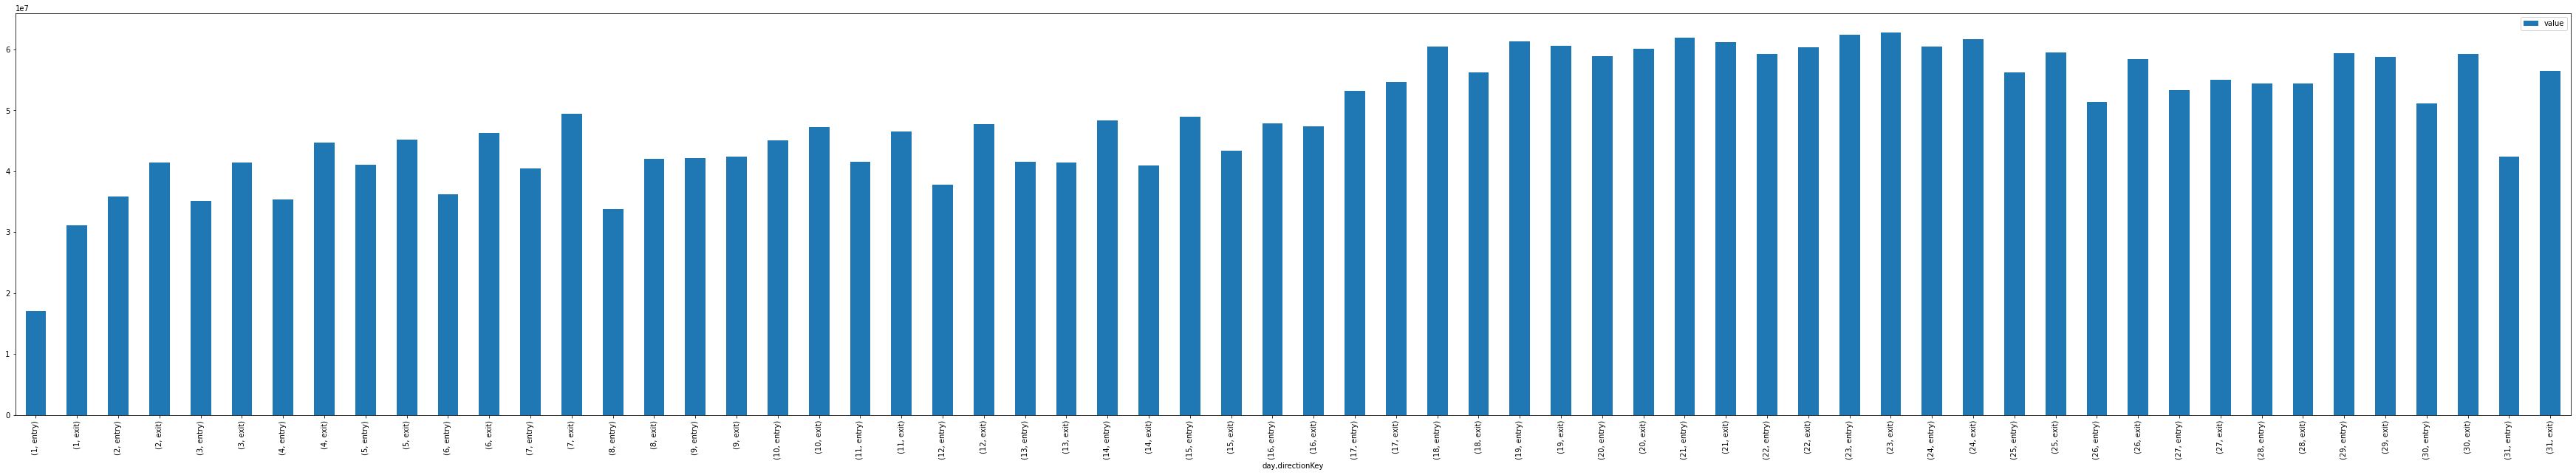

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))